# Sleep EEG preprocessing, spectral analyses and events detection

## Introductory notes:
This notebook presents minimal functionality needed to go through the cleaning, ICA and spectral analyses stages.
* For the cleaning part the functionality consists of resampling, filtering, bad channel selection and interpolation, and annotation of bad data spans.
* For the ICA part it is fitting and selecting components you want to exclude.
* For the spectral analyses part it is spectrogram+hypnogram, PSD per sleep stage and topomap per sleep stage per frequency band.
* For the events detection it is spindles, slow waves and rapid eye movements detection.

For the extended functionality check out corresponding notebooks.

### Import module
Add pipeline module to path and import its elements (just run this cell).

In [1]:
%matplotlib widget
from sleepeeg.pipeline import (
    CleaningPipe, ICAPipe, SpectralPipe, 
    SpindlesPipe, SlowWavesPipe, RapidEyeMovementsPipe
    )

## Cleaning

Initialize `CleaningPipe` object by providing it with path to eeg file and output directory in which you want the data to be saved.

In [2]:
pipe = CleaningPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\HZ4_SLEEP_20210629_132715.mff",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing")

Reading EGI MFF Header from C:\Users\Gennadiy\Documents\data\HZ4\HZ4_SLEEP_20210629_132715.mff...
    Reading events ...
    Assembling measurement info ...


### Resampling
This can take more than an hour depending on eeg signal size and specs of the computer you're running the analysis on.

In [3]:
pipe.mne_raw.load_data()

Reading 0 ... 8919090  =      0.000 ...  8919.090 secs...


<RawMff | signal1.bin, 264 x 8919091 (8919.1 s), ~17.54 GB, data loaded>

In [4]:
pipe.resample(
    sfreq=250,  # Desired new sampling frequency
)

### Filtering
Bandpass and notch filters

In [5]:
pipe.filter(
    l_freq=0.3,
    h_freq=None
)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Filter length: 2751 samples (11.004 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed:    9.6s finished


In [6]:
pipe.notch(freqs='50s')

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed:    8.9s finished


### Select bad channels and epochs

Select bad channels in the opened browser.

In [ ]:
pipe.plot()

In [7]:
pipe.read_bad_channels()

In [8]:
pipe.interpolate_bads(reset_bads=True)

Interpolating bad channels
    Automatic origin fit: head of radius 96.5 mm
Computing interpolation matrix from 220 sensor positions
Interpolating 37 sensors


Select bad epochs

Click "a" -> "Add description" -> Enter BAD_EPOCH -> Annotate bad data spans

In [ ]:
pipe.plot(butterfly=True)

In [9]:
pipe.read_annotations()

## ICA

Pass the preceding (cleaning) pipe to the ICA.

In [15]:
ica_pipe = ICAPipe(
    prec_pipe=pipe, 
    n_components=30)

Fit the ICA on the 1 Hz high-pass fitered data.

In [17]:
ica_pipe.fit()

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed:   10.5s finished


Fitting ICA to data using 257 channels (please be patient, this may take a while)
Omitting 166504 of 2229773 (7.47%) samples, retaining 2063269 (92.53%) samples.
Selecting by number: 30 components
Fitting ICA took 131.9s.


Visually inspect ICA components.

In [18]:
ica_pipe.plot_sources()

Creating RawArray with float64 data, n_channels=31, n_times=2229773
    Range : 0 ... 2229772 =      0.000 ...  8919.088 secs
Ready.
Using qt as 2D backend.


Pass to the `exclude` argument indices of components you want to remove from the raw signal.

In [19]:
ica_pipe.apply(exclude=[25,26])

Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 257 PCA components


## Spectral

Pass the preceding (cleaning or ICA) pipe to the SpectralPipe. Also provide pass to the hypnogram and don't forget to pass its frequency to the corresponding parameter.

In [20]:
spectral_pipe = SpectralPipe(
    prec_pipe=ica_pipe,
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    hypno_freq=1)

c:\Users\Gennadiy\Documents\eeg-processing-pipeline\.venv\Lib\site-packages\antropy\fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))
05-Jun-23 15:01:19 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


If you don't have a hypnogram, you can use the method `predict_hypno`, which will use [YASA's algorithm](https://raphaelvallat.com/yasa/build/html/generated/yasa.SleepStaging.html#yasa.SleepStaging). 

Make sure that the electrodes you provide are clean.

In [ ]:
# spectral_pipe.predict_hypno(
#         eeg_name = "E183",
#         eog_name = "E252",
#         emg_name = "E247",
#         ref_name = "E26",
#         save=False
# )

Pass an electrode name to calculate spectrogram for (e.g., E101)

In [23]:
spectral_pipe.plot_hypnospectrogram(
    picks=['E101'],
    win_sec=10,
    overlap=True)

Setting 166504 of 2229773 (7.47%) samples to NaN, retaining 2063269 (92.53%) samples.


In [25]:
spectral_pipe.compute_psds_per_stage(
    sleep_stages = {"Wake": 0, "N1": 1, "N2/3": (2,3), "REM": 4},
    reference = 'average',
    method="welch",  # welch or multitaper
    # Additional arguments passed to the PSD computing method, i.e., welch or multitaper:
    n_fft=1024,
    n_per_seg=1024,
    n_overlap=512,
    window="hann"
    )

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting 166504 of 2229773 (7.47%) samples to NaN, retaining 2063269 (92.53%) samples.
Setting 166504 of 2229773 (7.47%) samples to NaN, retaining 2063269 (92.53%) samples.
Setting 166504 of 2229773 (7.47%) samples to NaN, retaining 2063269 (92.53%) samples.
Setting 166504 of 2229773 (7.47%) samples to NaN, retaining 2063269 (92.53%) samples.


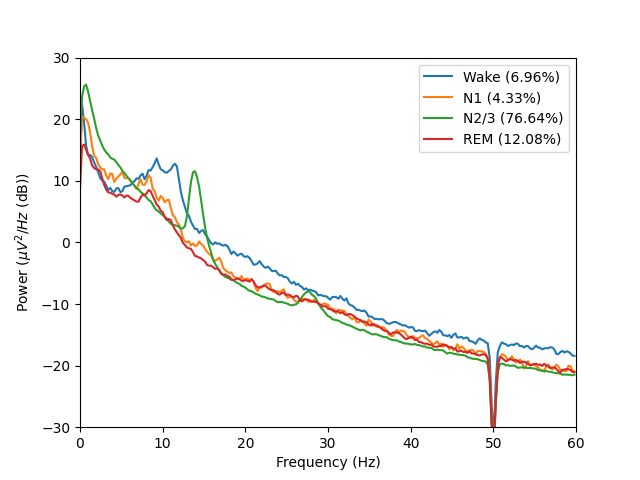

In [29]:
spectral_pipe.plot_psds(
    picks=['E101'],
    psd_range=(-30, 30))

Create a collage with rows for sleep stages and columns for bands.

In [30]:
spectral_pipe.plot_topomap_collage()

## Events

Pass the preceding (cleaning or ICA or spectral) pipe to one of the SpindlesPipe, SlowWavesPipe or RapidEyeMovementsPipe. If the preceding is cleaning or ICA - provide path to the hypnogram and don't forget to pass its frequency to the corresponding parameter.

In [31]:
spindles_pipe = SpindlesPipe(
    prec_pipe=spectral_pipe)
    
spindles_pipe.detect()
spindles_pipe.plot_average(
    center="Peak",
    hue="Stage",
    time_before=1,
    time_after=1,
)

05-Jun-23 15:06:27 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed:   10.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed:   12.5s finished


In [32]:
spindles_pipe.apply_tfr(
    freqs=(10,20), 
    n_freqs=100, 
    time_before=1, 
    time_after=1)
spindles_pipe.tfrs['N2'].plot(['E101'])

100%|██████████| 88/88 [00:01<00:00, 70.08it/s]


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


[<Figure size 640x480 with 2 Axes>]

In [33]:
slow_waves_pipe = SlowWavesPipe(
    prec_pipe=spindles_pipe)
    
slow_waves_pipe.detect()
slow_waves_pipe.plot_average(
    center="NegPeak",
    hue="Stage",
    time_before=0.4,
    time_after=0.8,
)

05-Jun-23 15:17:47 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed:   12.0s finished


100%|██████████| 252/252 [00:13<00:00, 19.09it/s]


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


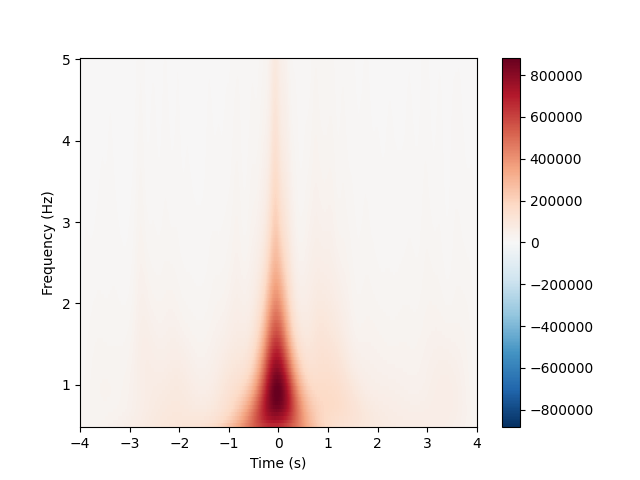

[<Figure size 640x480 with 2 Axes>]

In [35]:
slow_waves_pipe.apply_tfr(
    freqs=(0.5,5), 
    n_freqs=100, 
    time_before=4, 
    time_after=4, 
    n_cycles=2
    )
slow_waves_pipe.tfrs['N2'].plot(['E101'])

05-Jun-23 15:42:41 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting 166504 of 2229773 (7.47%) samples to NaN, retaining 2063269 (92.53%) samples.
Setting 166504 of 2229773 (7.47%) samples to NaN, retaining 2063269 (92.53%) samples.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


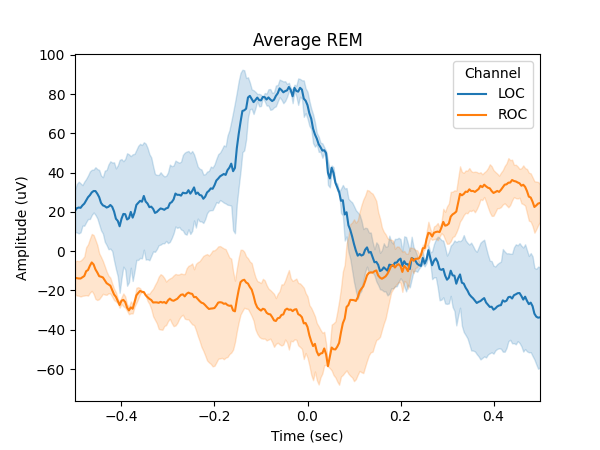

In [36]:
rems_pipe = RapidEyeMovementsPipe(
    prec_pipe=slow_waves_pipe)
    
rems_pipe.detect(        
    loc_chname="E252",
    roc_chname="E226",)

rems_pipe.plot_average(
    center="Peak",
    time_before=0.5,
    time_after=0.5,
    filt=(None,None),
    mask=None,
)